In [1]:
import pickle
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# import dataframe
with open('pickles/cleaned_df.pickle', 'rb') as data:
    df = pickle.load(data)

In [3]:
# import train_features
with open('pickles/train_features.pickle', 'rb') as data:
    train_features = pickle.load(data)

In [4]:
# import train_labels
with open('pickles/train_labels.pickle', 'rb') as data:
    train_labels = pickle.load(data)

In [5]:
# import test_features
with open('pickles/test_features.pickle', 'rb') as data:
    test_features = pickle.load(data)

In [6]:
#import test_labels
with open('pickles/test_labels.pickle', 'rb') as data:
    test_labels = pickle.load(data)

In [7]:
print(train_features.shape)
print(test_features.shape)

(1779, 300)
(445, 300)


### Multinomial Naive Bayes

Sklearn MultinomialNB documentation https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [8]:
mnb_classifier = MultinomialNB()
mnb_classifier

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [9]:
mnb_classifier.fit(train_features, train_labels)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [10]:
mnb_prediction = mnb_classifier.predict(test_features)

#### Find accuracy

In [11]:
# Training accuracy
train_accuracy = accuracy_score(train_labels, mnb_classifier.predict(train_features))
print(train_accuracy)

0.9567172568858909


In [12]:
# Testing accuracy
test_accuracy = accuracy_score(test_labels, mnb_prediction)
print(test_accuracy)

0.950561797752809


#### Classification report

In [13]:
print('Classification Report')
print(classification_report(test_labels, mnb_prediction))

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        89
           1       0.96      0.95      0.96        81
           2       0.98      0.99      0.99       111
           3       0.95      0.93      0.94        96
           4       0.97      0.93      0.95        68

    accuracy                           0.95       445
   macro avg       0.95      0.95      0.95       445
weighted avg       0.95      0.95      0.95       445



#### Confusion Matrix

In [14]:
conf_matrix = confusion_matrix(test_labels, mnb_prediction)
print(conf_matrix)

[[ 84   0   0   4   1]
 [  3  77   1   0   0]
 [  0   1 110   0   0]
 [  4   2   0  89   1]
 [  3   0   1   1  63]]


In [15]:
aux_df = df[['category', 'category_code']].drop_duplicates().sort_values('category_code')

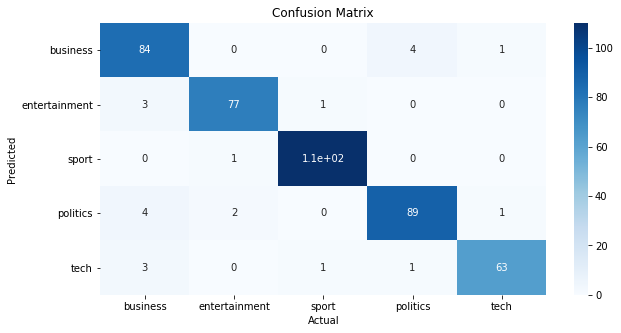

In [16]:
plt.figure(figsize=(10,5))
sb.heatmap(conf_matrix,
          annot=True,
          xticklabels=aux_df['category'].values,
          yticklabels=aux_df['category'].values,
          cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [17]:
model_accuracies = {
    'Model' : 'Multinomial Naive Bayes',
    'Training Set Accuracy' : train_accuracy,
    'Test Set Accuracy' : test_accuracy
}
df_mnbc_accuracy = pd.DataFrame(model_accuracies, index=[0])

In [18]:
df_mnbc_accuracy

,Model,Training Set Accuracy,Test Set Accuracy
0,Multinomial Naive Bayes,0.956717,0.950562


In [19]:
# save the model
with open('pickles/mnb_classifier.pickle', 'wb') as output:
    pickle.dump(mnb_classifier, output)

In [20]:
# save model accuracy dataframe
with open('pickles/df_mnbc_accuracy.pickle', 'wb') as output:
    pickle.dump(df_mnbc_accuracy, output)